In [1]:
import string         #(module for string)
import sys            #(module system)
import numpy as np    #(module mathematical stuff)
import fileinput
import math
import operator
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors
import scipy
import itertools

In [2]:
#SIR epidemic with vaccination

def epi_dyn(N, beta, mu, I0, ratev, VEI, VES):
    
    Tmax= 100000 # maximum number of timesteps for the numerical integration
    rI= 1-VEI
    rS= 1-VES
    
    S=[] 
    I=[]
    R=[]
    SV=[] 
    IV=[]
    RV=[]
    incidence=[] 
    incidence_vax=[] 

    S.append(N-I0)
    I.append(I0)
    R.append(0)
    SV.append(0)
    IV.append(0)
    RV.append(0)
    incidence.append(0)
    incidence_vax.append(0)

    for t in range(Tmax):
        #Force of Infection
        FOI = beta*(I[t]+IV[t]*rI)/N
        
        #Vaccinated
        vax = ratev*S[t]
        
        #Infection and Recovery of Unvaccinated
        new_inf_unvac = S[t]*FOI
        new_recov_unvac = I[t]*mu
        
        #Infection and Recovery of Vaccinated
        new_inf_vac = SV[t]*FOI*rS
        new_recov_vac = IV[t]*mu
        
        #Update Unvaccinated
        S.append(S[t]-vax-new_inf_unvac)
        I.append(I[t]+new_inf_unvac-new_recov_unvac)
        R.append(R[t]+new_recov_unvac)
        incidence.append(new_inf_unvac)
        
        SV.append(SV[t]+vax-new_inf_vac)
        IV.append(IV[t]+new_inf_vac-new_recov_vac)
        RV.append(RV[t]+new_recov_vac)
        incidence_vax.append(new_inf_vac)

       
        if I[t+1]+IV[t+1]<= 1.0:
            break #required because the epidemic has no end unless said so

    size= sum(incidence)
    size_vax= sum(incidence_vax)
    size_tot= size+size_vax

    return S, I, R, SV, IV, RV, size, size_vax, size_tot

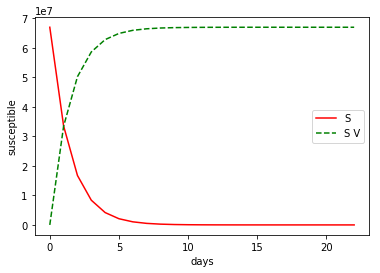

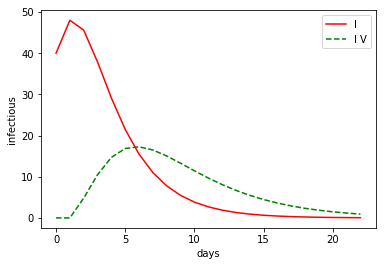

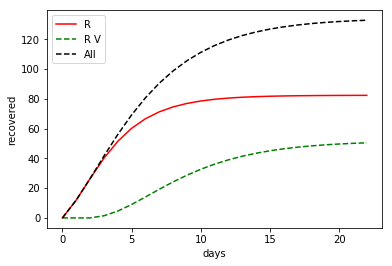

In [14]:
#Explore SIR epidemic with vaccination

#transmission parameters
N= 67000000 #French population
beta= 0.5 #transmissibility
mu= 0.3 #recovery rate
I0= 40 #initial infectious

#vaccination parameters
VEI= 0.6 #vaccine efficacy for transmission
VES= 0.6 #vaccine efficacy for susceptibility
ratev= 0.5 #rate of vaccine administering 

S, I, R, SV, IV, RV, size, size_vax, size_tot = epi_dyn(N, beta, mu, I0, ratev, VEI, VES)
    
plt.figure()
plt.plot(S, color = 'red', alpha=1, label='S')
plt.plot(SV, color = 'green', linestyle="dashed", alpha=1, label='S V')
plt.xlabel("days")
plt.ylabel("susceptible")
plt.legend()
plt.show()
plt.close()  

plt.figure()
plt.plot(I, color = 'red', alpha=1, label='I')
plt.plot(IV, color = 'green', linestyle="dashed", alpha=1, label='I V')
plt.xlabel("days")
plt.ylabel("infectious")
plt.legend()
plt.show()
plt.close()  

plt.figure()
plt.plot(R, color = 'red', alpha=1, label='R')
plt.plot(RV, color = 'green', linestyle="dashed", alpha=1, label='R V')
plt.plot(np.array(RV)+np.array(R), color = 'black', linestyle="dashed", alpha=1, label='All')
plt.xlabel("days")
plt.ylabel("recovered")
plt.legend()
plt.show()
plt.close()  


When the var is changed to 
- VEI= 0.6 #vaccine efficacy for transmission
- VES= 0.6 #vaccine efficacy for susceptibility
- ratev= 0.1
In this case, there is a period where the number of vaccinated infectious is higher than non vaccinated infectious. But that is because the rate of vaccination is too fast. 

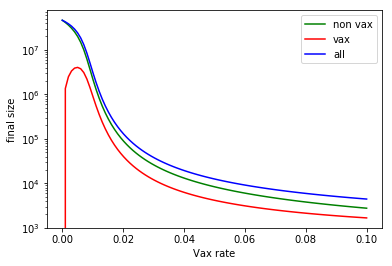

In [17]:
#Analyze the effect of the vaccination rate

#transmission parameters
N= 67000000 #French population
beta= 0.5 #transmissibility
mu= 0.3 #recovery rate
I0= 400 #initial infectious

#vaccination parameters
VEI= 0.4 #vaccine efficacy for transmission
VES= 0.6 #vaccine efficacy for susceptibility

x=[]
y1=[]
y2=[]
y3=[]

for ratev in np.linspace(0.00, 0.1, 100):
    S, I, R, SV, IV, RV, size, size_vax, size_tot = epi_dyn(N, beta, mu, I0, ratev, VEI, VES)
    
    x.append(ratev)
    y1.append(size)
    y2.append(size_vax)
    y3.append(size_tot)
    
plt.figure()
plt.plot(x,y1, color = 'green', alpha=1, label='non vax')
plt.plot(x,y2, color = 'red', alpha=1, label='vax')
plt.plot(x,y3, color = 'blue', alpha=1, label='all')
plt.xlabel("Vax rate")
plt.ylabel("final size")
plt.legend()
plt.yscale('log')
plt.show()
plt.close()  



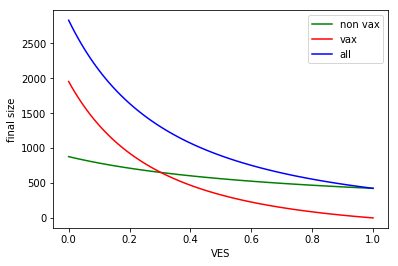

In [22]:
#Analyze the effect of the vaccine efficacy for susceptibility

#transmission parameters
N= 67000000 #French population
beta= 0.5 #transmissibility
mu= 0.3 #recovery rate
I0= 40 #initial infectious

#vaccination parameters
VEI= 0.6 #vaccine efficacy for transmission
ratev= 0.06 #rate of vaccine administering 

x=[]
y1=[]
y2=[]
y3=[]

for VES in np.linspace(0., 1, 100):
    S, I, R, SV, IV, RV, size, size_vax, size_tot = epi_dyn(N, beta, mu, I0, ratev, VEI, VES)
    
    x.append(VES)
    y1.append(size)
    y2.append(size_vax)
    y3.append(size_tot)
    
plt.figure()
plt.plot(x,y1, color = 'green', alpha=1, label='non vax')
plt.plot(x,y2, color = 'red', alpha=1, label='vax')
plt.plot(x,y3, color = 'blue', alpha=1, label='all')
plt.xlabel("VES")
plt.ylabel("final size")
plt.legend()
plt.show()
plt.close()  



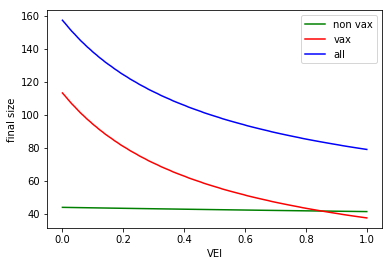

In [13]:
#Analyze the effect of the accine efficacy for transmission

#transmission parameters
N= 67000000 #French population
beta= 0.5 #transmissibility
mu= 0.3 #recovery rate
I0= 40 #initial infectious

#vaccination parameters
VES= 0.6 #vaccine efficacy for susceptibility
ratev= 0.5 #rate of vaccine administering 

x=[]
y1=[]
y2=[]
y3=[]

for VEI in np.linspace(0., 1, 100):
    S, I, R, SV, IV, RV, size, size_vax, size_tot = epi_dyn(N, beta, mu, I0, ratev, VEI, VES)
    
    x.append(VEI)
    y1.append(size)
    y2.append(size_vax)
    y3.append(size_tot)
    
plt.figure()
plt.plot(x,y1, color = 'green', alpha=1, label='non vax')
plt.plot(x,y2, color = 'red', alpha=1, label='vax')
plt.plot(x,y3, color = 'blue', alpha=1, label='all')
plt.xlabel("VEI")
plt.ylabel("final size")
plt.legend()
plt.show()
plt.close()  



in summa, vaccination rate is as important as vaccine efficacy. Fast enough rate might able to prevent the growing of epidemic given a certain level of low vaccine efficacy. 

In [26]:
def epi_dyn_sys_asys(N, beta, mu, ps, ra, isol, I0, ratev, VES, VESy):
    
    Tmax= 100000 # maximum number of timesteps for the numerical integration
    rS= 1-VES
    rSy= 1-VESy
    
    S=[] 
    Isys=[]
    Iasys=[]
    R=[]
    SV=[] 
    IVsys=[]
    IVasys=[]
    RV=[]
    incidence_sys=[] 
    incidence_asys=[] 

    S.append(N-I0)
    Isys.append(I0)
    Iasys.append(0)
    R.append(0)
    SV.append(0)
    IVsys.append(0)
    IVasys.append(0)    
    RV.append(0)
    incidence_sys.append(0)
    incidence_asys.append(0)

    for t in range(Tmax):

        #vaccination
        vax= ratev*S[t]

        #force of infection
        FOI= beta*float(Isys[t] + IVsys[t] + ra*(Iasys[t] + IVasys[t]))/float(N)

        #infection and recovery of unvaccinated
        infected= S[t]*FOI
        infected_sys= ps*infected
        infected_asys= (1-ps)*infected
        recovered_from_sys= Isys[t]*mu*isol
        recovered_from_asys= Iasys[t]*mu

        #infection and recovery of vaccinated
        infected_vax= SV[t]*FOI*rS
        infected_sys_vax= ps*rSy*infected_vax
        infected_asys_vax= (1-ps*rSy)*infected_vax
        recovered_from_sys_vax= IVsys[t]*mu*isol
        recovered_from_asys_vax= IVasys[t]*mu

        #update
        S.append(S[t] - infected - vax)
        Isys.append(Isys[t] + infected_sys - recovered_from_sys)
        Iasys.append(Iasys[t] + infected_asys - recovered_from_asys)        
        R.append(R[t] + recovered_from_sys + recovered_from_asys)
        SV.append(SV[t] - infected_vax + vax)
        IVsys.append(IVsys[t] + infected_sys_vax - recovered_from_sys_vax)
        IVasys.append(IVasys[t] + infected_asys_vax - recovered_from_asys_vax)        
        RV.append(RV[t] + recovered_from_sys_vax+recovered_from_asys_vax)

        incidence_sys.append(infected_sys+infected_sys_vax)
        incidence_asys.append(infected_asys+infected_asys_vax)
        
        if Isys[t+1]+IVsys[t+1]+Iasys[t+1]+IVasys[t+1]<= 1.0:
            break

    size_sys= sum(incidence_sys)
    size_asys= sum(incidence_asys)

    return S, Isys, Iasys, R, SV, IVsys, IVasys, RV, size_sys, size_asys

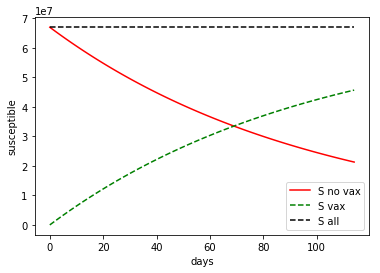

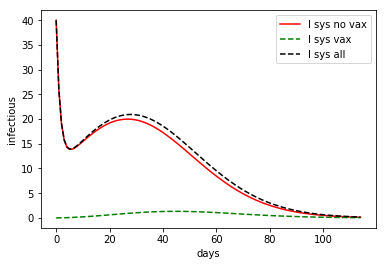

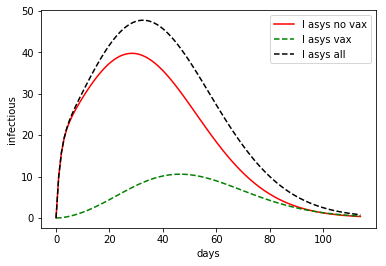

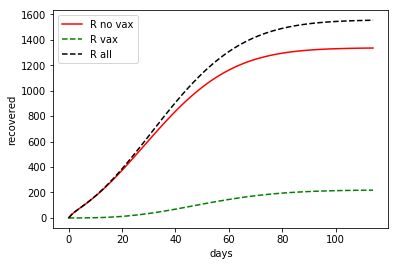

In [33]:
#transmission parameters
N= 67000000 #French population
beta= 0.5 #transmissibility
mu= 0.3 #recovery rate
I0= 40 #initial infectious
ps= 0.5 #probability to develop symptoms 
ra= 0.9 #rescaling in infectiousnees for asymptomatic cases
isol= 2  #increase in recovery rate for symptomatic cases due to isolation, need to be bigger than 1

#vaccination parameters
VESy= 0.6 #vaccine efficacy for symptoms 
VES= 0.6 #vaccine efficacy for susceptibility
ratev= 0.01 #rate of vaccine administering 

S, Isys, Iasys, R, SV, IVsys, IVasys, RV, size_sys, size_asys= epi_dyn_sys_asys(N, beta, mu, ps, ra, isol, I0, ratev, VES, VESy)

plt.figure()
plt.plot(S, color = 'red', alpha=1, label='S no vax')
plt.plot(SV, color = 'green', linestyle="dashed", alpha=1, label='S vax')
plt.plot(np.array(SV)+np.array(S), color = 'black', linestyle="dashed", alpha=1, label='S all')
plt.xlabel("days")
plt.ylabel("susceptible")
plt.legend()
plt.show()
plt.close()  

plt.figure()
plt.plot(Isys, color = 'red', alpha=1, label='I sys no vax')
plt.plot(IVsys, color = 'green', linestyle="dashed", alpha=1, label='I sys vax')
plt.plot(np.array(Isys)+np.array(IVsys), color = 'black', linestyle="dashed", alpha=1, label='I sys all')
plt.xlabel("days")
plt.ylabel("infectious")
plt.legend()
plt.show()
plt.close()  

plt.figure()
plt.plot(Iasys, color = 'red', alpha=1, label='I asys no vax')
plt.plot(IVasys, color = 'green', linestyle="dashed", alpha=1, label='I asys vax')
plt.plot(np.array(Iasys)+np.array(IVasys), color = 'black', linestyle="dashed", alpha=1, label='I asys all')
plt.xlabel("days")
plt.ylabel("infectious")
plt.legend()
plt.show()
plt.close()  

plt.figure()
plt.plot(R, color = 'red', alpha=1, label='R no vax')
plt.plot(RV, color = 'green', linestyle="dashed", alpha=1, label='R vax')
plt.plot(np.array(RV)+np.array(R), color = 'black', linestyle="dashed", alpha=1, label='R all')
plt.xlabel("days")
plt.ylabel("recovered")
plt.legend()
plt.show()
plt.close()  


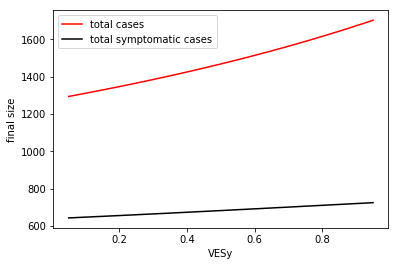

In [11]:
#transmission parameters
N= 67000000 #French population
beta= 0.5 #transmissibility
mu= 0.3 #recovery rate
I0= 40 #initial infectious
ps= 0.5
ra= 0.9

#vaccination parameters
VES= 0.6 #vaccine efficacy for susceptibility
ratev= 0.01 #rate of vaccine administering 
isol= 2


cmap = plt.cm.get_cmap('PiYG')
plt.figure()

x=[]
y1=[]
y2=[]
for VESy in np.linspace(0.05, 0.95, 100):
    S, Isys, Iasys, R, SV, IVsys, IVasys, RV, size_sys, size_asys= epi_dyn_sys_asys(N, beta, mu, ps, ra, isol, I0, ratev, VES, VESy)
    x.append(VESy)
    y1.append(size_sys+size_asys)
    y2.append(size_sys)

plt.plot(x,y1, color="red", alpha=1, label="total cases")
plt.plot(x,y2, color="black", alpha=1, label="total symptomatic cases")

plt.xlabel("VESy")
plt.ylabel("final size")
plt.legend()
plt.show()
plt.close()  
